# MNIST with custom framework

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from new import *
from losses import *

## Load MNIST dataset

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Define the model

In [3]:
class BobNet(Module):
    def __init__(self):
        self.l1 = Linear(784, 16)
        self.a1 = Sigmoid()
        self.l2 = Linear(16, 10)
        self.a2 = Softmax()
    def forward(self, inputs: np.ndarray):
        out = self.l1.forward(inputs)
        out = self.a1.forward(out)
        out = self.l2.forward(out)
        out = self.a2.forward(out)
        return out
    def parameters(self):
        params = []
        params.extend(self.l1.parameters())
        params.extend(self.l2.parameters())
        return params
    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0.0
    def update(self, lr=0.01):
        for p in self.parameters():
            p.data += -lr * p.grad

In [4]:
model = BobNet()
print("number of parameters: ", len(model.parameters()))

number of parameters:  12730


## Training

In [5]:
loss_function = CrossEntropyLoss()
batch_size = 32
losses = []

#### Create and resize sample batch

In [21]:
samp = np.random.randint(0, x_train.shape[0], size=batch_size)
print("input indexes: ", samp)
print("input shape: ", x_train[samp].shape)
xs = x_train[samp].reshape(x_train[samp].shape[0], -1)
print("input flattened: ", xs.shape)

input indexes:  [41989 58551 34022 25583 29115 19485 28174 19554  1620 24377 53928 26446
  9418 23005  5183 43098 53709 33500 47976 46711 25882 42217  1509 55935
 43175  4656 50946 18542 54398 14960  5736 36199]
input shape:  (32, 28, 28)
input flattened:  (32, 784)


In [22]:
ys = y_train[samp]
print("targets: ", ys)
print("output shape: ", ys.shape)

targets:  [0 4 4 8 4 0 3 0 9 6 0 7 3 5 8 5 2 3 0 4 3 0 5 2 5 0 3 3 3 6 3 8]
output shape:  (32,)


### Forward

In [23]:
out = np.array([model.forward(x) for x in xs])
print("output shape: ", out.shape)
print("output[0]: ", out[0])

output shape:  (32, 10)
output[0]:  [Value(data=0.09924312090416813, grad=0.0)
 Value(data=0.05153891340935311, grad=0.0)
 Value(data=0.07942960524530816, grad=0.0)
 Value(data=0.0951962517301854, grad=0.0)
 Value(data=0.032869320013666825, grad=0.0)
 Value(data=0.19368054978473098, grad=0.0)
 Value(data=0.16980865297878386, grad=0.0)
 Value(data=0.1118623700202031, grad=0.0)
 Value(data=0.12899393666598882, grad=0.0)
 Value(data=0.03737727924761156, grad=0.0)]


In [24]:
loss = loss_function.forward(out, ys)
losses.append(loss.data)
print(loss)

Value(data=70.22978428666114, grad=0.0)


### Backward

In [25]:
model.zero_grad()
loss.backward()

### Update

In [26]:
model.update(lr=0.1)

[73.66721424873813, 74.22040932144023, 70.22978428666114, 99.02710257278567, 87.97916197539547, 74.29799050502791, 65.98294266669987, 71.37872941438143, 59.315064441068905, 79.03121737731662, 65.1806677112566, 87.44547380494657, 89.70040770281665, 87.62183902768139, 71.76152249809557, 70.8284623379393, 96.6157439160115, 89.32049720460505, 72.9978806547176, 66.07167540189243, 70.47499355757466, 63.06674850331274, 68.69918986892418, 62.42852306392275, 84.14932906159336, 72.07846843368029, 69.43649735877234, 60.163547824173506, 67.03656496031542, 78.29682331415003, 84.9712688513932, 92.176231925702, 77.32849411348329, 71.14058386252039, 51.394629400640824, 77.49879024404667, 52.97763443843438, 63.21713642616503, 46.34465126035116, 46.42153490608142, 73.72670100853435, 56.7733098176831, 63.500154733678485, 47.928015200282886, 52.84550490256241, 67.03607741835958, 67.95724040888682, 77.81545273206808, 60.339721057698625, 58.08946467963873, 46.64471236766408, 51.31906770553046, 50.1921227771

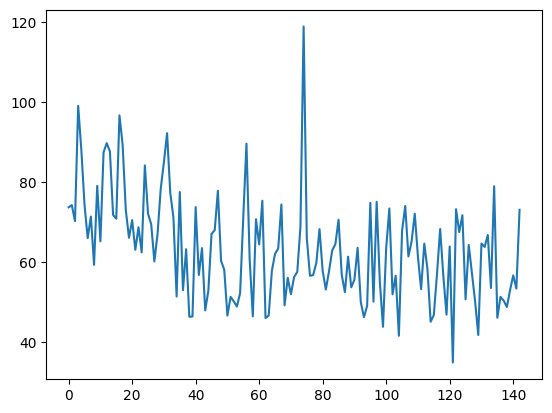

In [37]:
print(losses)
plt.plot(losses)

In [36]:
for i in range(100):
    samp = np.random.randint(0, x_train.shape[0], size=batch_size)
    xs = x_train[samp].reshape(x_train[samp].shape[0], -1)
    ys = y_train[samp]
    out = np.array([model.forward(x) for x in xs])
    loss = loss_function.forward(out, ys)
    losses.append(loss.data)
    model.zero_grad()
    loss.backward()
    model.update(lr=0.1)
    print(loss.data)

47.928015200282886
52.84550490256241
67.03607741835958
67.95724040888682
77.81545273206808
60.339721057698625
58.08946467963873
46.64471236766408
51.31906770553046
50.19212277713692
48.909737514633626
52.255704815126265
71.29971766051717
89.57831404941781
60.76817638735397
46.44232756398882
70.69643109499253
64.42181839619111
75.31895950479618
46.033246742179806
46.6592616005076
57.84146090155605
62.056977744496926
63.403062126622594
74.38341006292623
49.20231464285933
56.06708476852209
51.96026832048324
56.273315097526584
57.53893187218243
68.82462594940787
118.82028427224515
65.99736859842399
56.57771203800668
56.76090342471588
59.779321815184026
68.22600756986519
57.77157331239483
53.150731586935365
57.74040224978545
62.92289012951047
64.49098117727569
70.58570712541115
56.863042653055544
52.488054109444924
61.35373806255574
53.70171549344975
55.62719094239492
63.56549161332143
49.98875099744806
46.23384172059704
49.07833344144816
74.79320828476706
50.12194650400259
75.0502151645901